<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/EDA_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

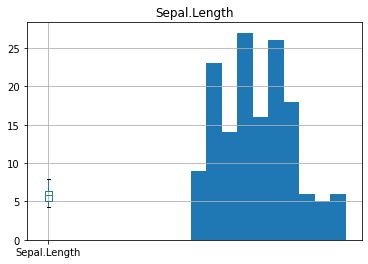

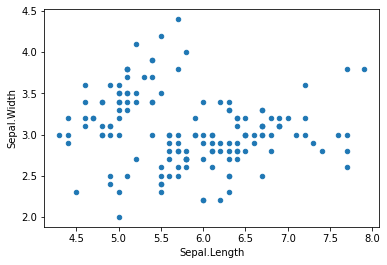

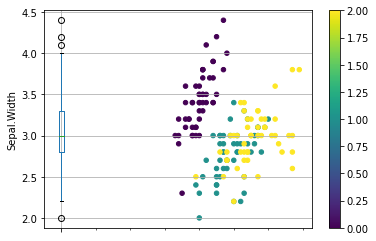

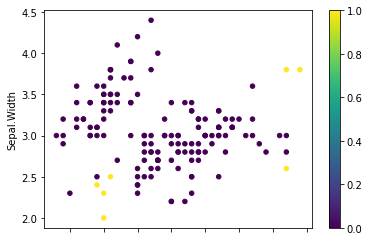

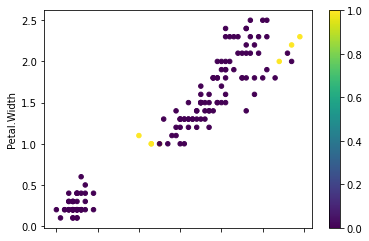

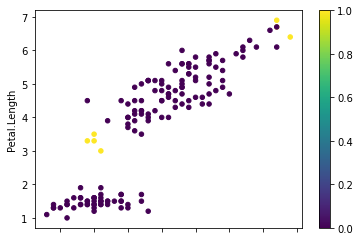

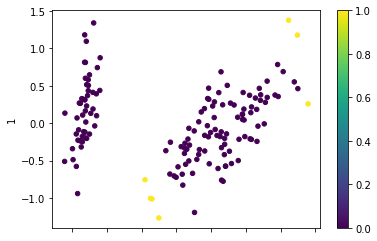

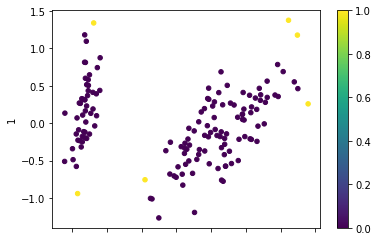

In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

###########################################################
# EDA
###########################################################

df = pd.read_csv('data01_iris.csv')
df.head()
df.describe(include='all')
df['Species'].value_counts()

# visualization of pandas
df.hist('Sepal.Length')
df.boxplot('Sepal.Length')
df.plot.scatter('Sepal.Length','Sepal.Width')
SpeciesCode = df['Species'].astype('category').cat.codes
df.plot.scatter('Sepal.Length','Sepal.Width',c=SpeciesCode,colormap='viridis')


###########################################################
# Outlier Detection
###########################################################

# univariate outlier detection
# outlier check for each variable
df.boxplot('Sepal.Width')

# multivariate outlier detection
x = df.iloc[:,:-1].values
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x)
center_matrix = km.cluster_centers_[km.labels_,:]
dist = ((x-center_matrix)**2).sum(axis=1)
np.sort(dist)
outlier_idx = dist>2.0

df.plot.scatter('Sepal.Length','Sepal.Width',c=outlier_idx,colormap='viridis')
df.plot.scatter('Petal.Length','Petal.Width',c=outlier_idx,colormap='viridis')
df.plot.scatter('Sepal.Length','Petal.Length',c=outlier_idx,colormap='viridis')

# pca
from sklearn.decomposition import PCA
pca = PCA()
xtrans = pca.fit_transform(x)
df_trans = pd.DataFrame(xtrans)
df_trans.plot.scatter(0,1,c=outlier_idx,colormap='viridis')

# using sophisticated functions
from sklearn.neighbors import LocalOutlierFactor
f = LocalOutlierFactor()
detect = f.fit_predict(x)
outlier_idx2 = detect==-1
pd.crosstab(outlier_idx,outlier_idx2)
df_trans.plot.scatter(0,1,c=outlier_idx2,colormap='viridis')


###########################################################
# Missing Value Imputation 
###########################################################

df = pd.read_csv('data11_khan2.csv')
xorg = df.values

# missing value detection
naidx = np.isnan(xorg)
naidx.sum()
naidx.sum(axis=0)
naidx.sum(axis=1)
xorg[naidx]

# simple missing value imputation
from sklearn.impute import SimpleImputer

f = SimpleImputer(missing_values=np.nan,strategy='mean')
xfill = f.fit_transform(xorg)
np.isnan(xfill).sum().sum()
xfill[naidx]

f = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
xfill = f.fit_transform(xorg)
xfill[naidx]

